In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
from analysis import model_generated, selection, add_variables, final_selection, phsp_generator, mass_fitting
from k3pi_utilities import helpers
from matplotlib.backends.backend_pdf import PdfPages
from analysis.mass_fitting import get_yields, fit_parameters
from k3pi_config.modes import MODE, gcm
from k3pi_config import config
#config.candidates_selection = True
#config.optimised_selection = True
#config.misid_selection = True
from k3pi_plotting import utils as plot_utils
from analysis import efficiencies
import numpy as np
import matplotlib.pyplot as plt
from k3pi_plotting import comparison
from k3pi_config.modes.D0ToKpipipi_RS import D0ToKpipipi_RS as mode_config
from k3pi_utilities import variables as vars
from k3pi_utilities import logger

/afs/cern.ch/user/d/dmuller/work/anaconda3/envs/k3pi_python3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/afs/cern.ch/user/d/dmuller/work/anaconda3/envs/k3pi_python3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
with MODE('MagBoth', 1516, '2tag_WS'):
    mode = gcm()
    df = gcm().get_data([
            vars.dtf_pt(mode.Pi_OS1), vars.dtf_eta(mode.Pi_OS1),
            vars.dtf_phi(mode.Pi_OS1),
            vars.dtf_pt(mode.Pi_SS), vars.dtf_eta(mode.Pi_SS),
            vars.dtf_phi(mode.Pi_SS),
            vars.dtf_pt(mode.K), vars.dtf_eta(mode.K),
            vars.dtf_phi(mode.K),
            vars.dtf_pt(mode.Pi_OS2), vars.dtf_eta(mode.Pi_OS2),
            vars.dtf_phi(mode.Pi_OS2),
            vars.pt(mode.Pi_OS1), vars.eta(mode.Pi_OS1),
            vars.phi(mode.Pi_OS1),
            vars.pt(mode.Pi_SS), vars.eta(mode.Pi_SS),
            vars.phi(mode.Pi_SS),
            vars.pt(mode.K), vars.eta(mode.K),
            vars.phi(mode.K),
            vars.pt(mode.Pi_OS2), vars.eta(mode.Pi_OS2),
            vars.phi(mode.Pi_OS2),
            vars.dtf_dm(), vars.dm(), vars.m(mode.D0), vars.m(mode.Dstp), vars.dtf_chi2(gcm().head)         
      ])
    sw = mass_fitting.get_sweights()
    add_variables.append_phsp(df)
    ws_sel = final_selection.get_final_selection()
    sw_sel = selection.mass_signal_region()
    sb_sel = selection.mass_sideband_region()

    sf = df[ws_sel]

INFO:buffer_load:Loading Cached/get_sweightsD0ToKpipipi_2tag_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/phsp_variablesD0ToKpipipi_2tag_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_2tag_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/mass_signal_regionD0ToKpipipi_2tag_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/mass_sideband_regionD0ToKpipipi_2tag_WSMagBoth1516 from output/data/store.h5


In [3]:
with MODE('MagBoth', 1516, 'WS'):
    mode = gcm()
    config.candidates_selection = True
    config.optimised_selection = True
    config.misid_selection = True
    pf = gcm().get_data([
            vars.dtf_dm(), vars.dm(), vars.m(mode.D0), vars.m(mode.Dstp), vars.dtf_chi2(gcm().head)         
      ])
    pw = mass_fitting.get_sweights()
    add_variables.append_phsp(pf)
    ps_sel = final_selection.get_final_selection()
    pw_sel = selection.mass_signal_region()
    pb_sel = selection.mass_sideband_region()
    config.candidates_selection = False
    config.optimised_selection = False
    config.misid_selection = False

INFO:buffer_load:Loading Cached/get_sweightsD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/phsp_variablesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/bdt_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/spearmint_spi_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_right_sign_candidatesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/randomly_remove_candidatesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_clonesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/misid_cutD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/mass_signal_regionD0ToKpipipi_WSMagBoth1516 from output/data

In [4]:
with MODE('MagBoth', 1516, '2tag_WS'):
    sel = selection.pid_fiducial_selection()
    sel &= selection.pid_selection()
    sel &= selection.slow_pion()

    fsel = sel& selection.full_selection()

INFO:buffer_load:Loading Cached/pid_fiducial_selectionD0ToKpipipi_2tag_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/pid_selectionD0ToKpipipi_2tag_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/slow_pionD0ToKpipipi_2tag_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_2tag_WSMagBoth1516 from output/data/store.h5


In [5]:
with MODE('MagBoth', 1516, '2tag_WS'):
    outfile = gcm().get_output_path('effs') + 'prompt_2tag_comparison.pdf'
    with PdfPages(outfile) as pdf:
        for var in gcm().phsp_vars:
            var.binning = (30, *var.binning[1:])
            ax=comparison.plot_comparison(var, filled=pf[var.var][ps_sel], errorbars=df[var.var][ws_sel],
                                      filled_label='Prompt', errorbars_label='Double tag', normed_max=False,
                                      filled_weight=pw.sig, errorbars_weight=sw.sig, add_uncertainties=True)
            plot_utils.y_margin_scaler(ax, lf=0, la=True)
            ax.set_xlabel(var.xlabel)
            ax.legend(loc='best')
            ax.set_ylabel('Arbitrary units') 
            pdf.savefig(plt.gcf())
            plt.close()

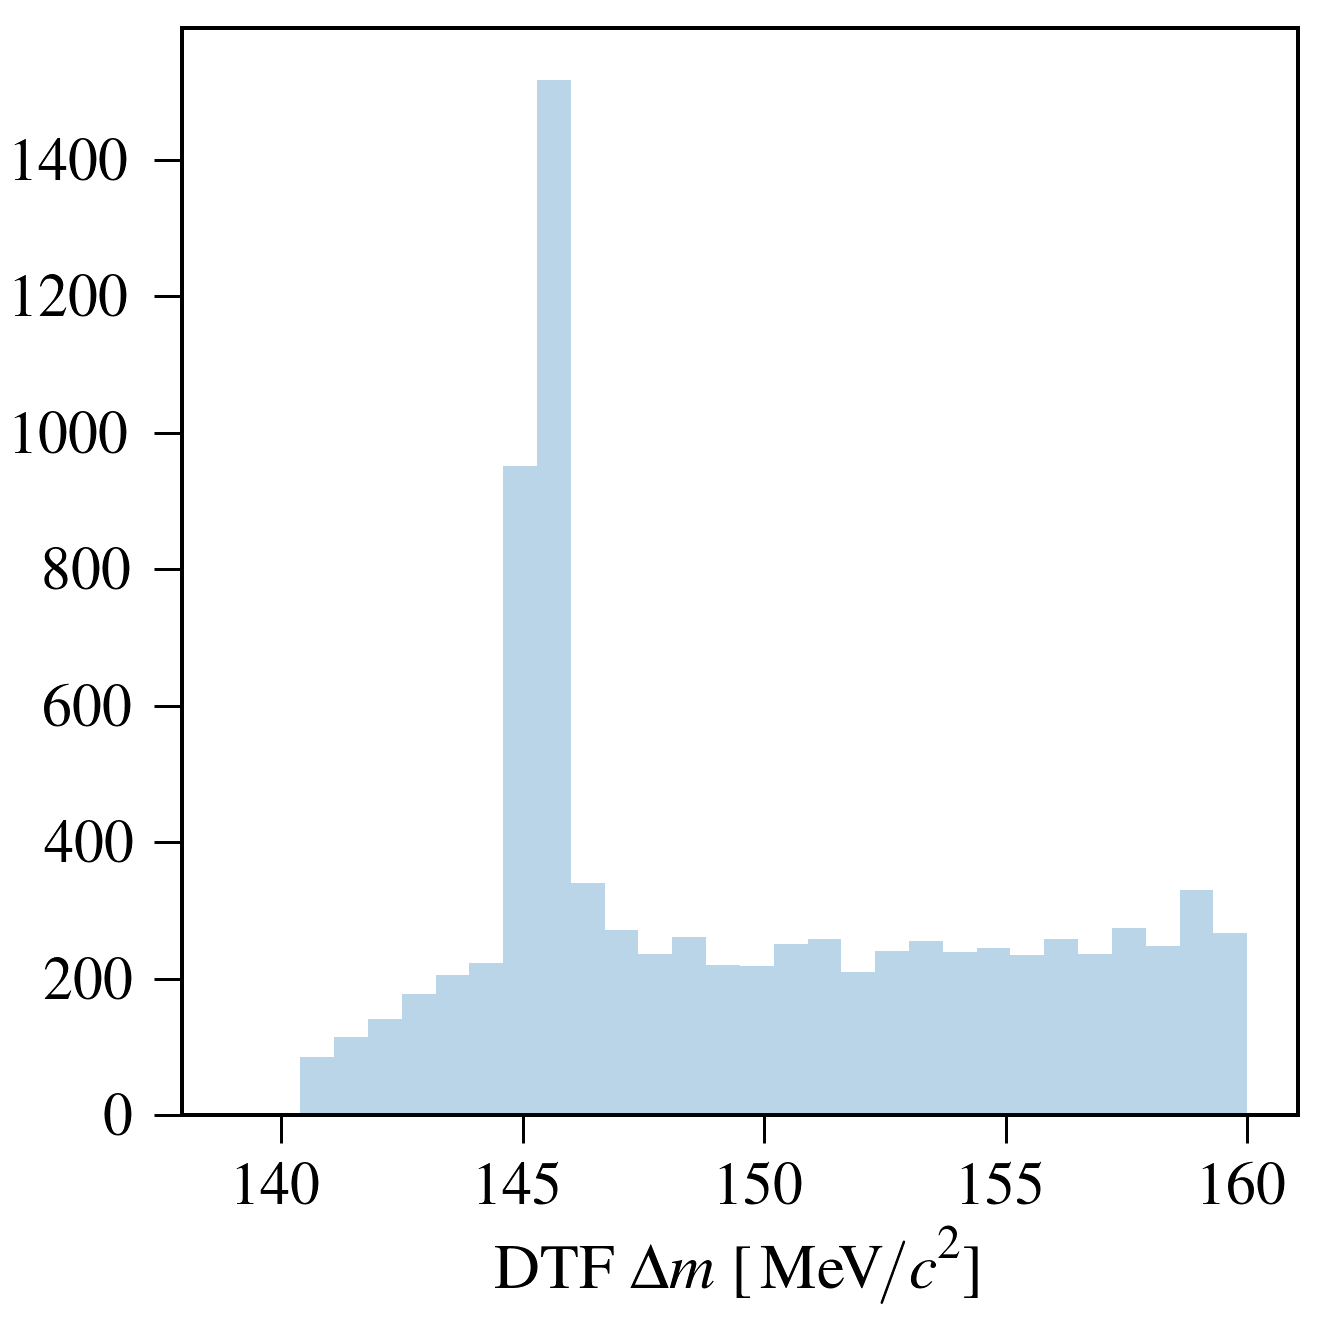

In [11]:
with MODE('MagBoth', 1516, '2tag_WS'):
    m12 = gcm().dmass_var
    fig, ax = plt.subplots(figsize=(10, 10))
    #ax.hist(df.delta_m_dtf[sel], bins=30, range=(139,160), alpha=0.3);
    ax.hist(df.delta_m_dtf[ws_sel], bins=30, range=(139,160), alpha=0.3);

    ax.set_xlabel(m12.xlabel)

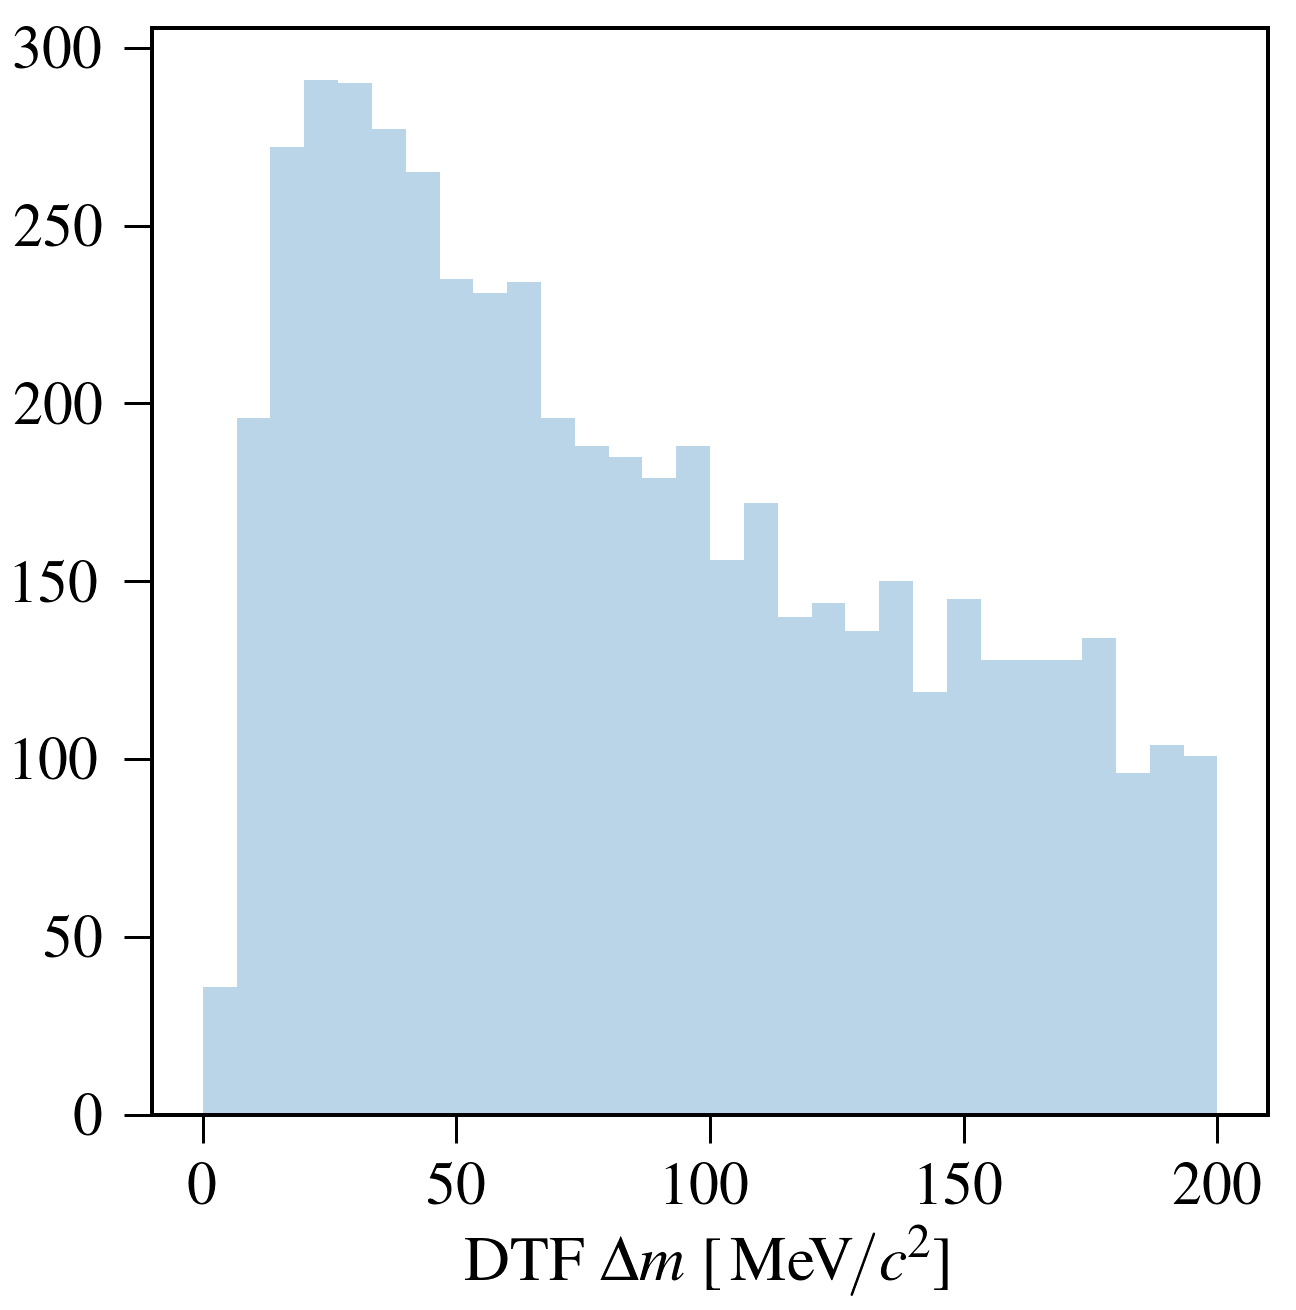

In [87]:
with MODE('MagBoth', 1516, '2tag_WS'):
    m12 = gcm().dmass_var
    fig, ax = plt.subplots(figsize=(10, 10))
    #ax.hist(df.delta_m_dtf[sel], bins=30, range=(139,160), alpha=0.3);
    ax.hist(df[vars.dtf_chi2(gcm().head)], bins=30, alpha=0.3, range=(0,200));

    ax.set_xlabel(m12.xlabel)